In [1]:
import sys
sys.path.append("../../")

In [29]:
import pandas as pd
import numpy as np

from ml.visualization.visualization import Visualization
from ml.data_source.spreadsheet import Spreadsheet

import warnings
warnings.filterwarnings('ignore')

# Carregando os dados


Aqui vamos trabalhar com o dataset do Titanic.

In [3]:
df = Spreadsheet().get_data('../../../data/raw/train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Quem são minhas variáveis?

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

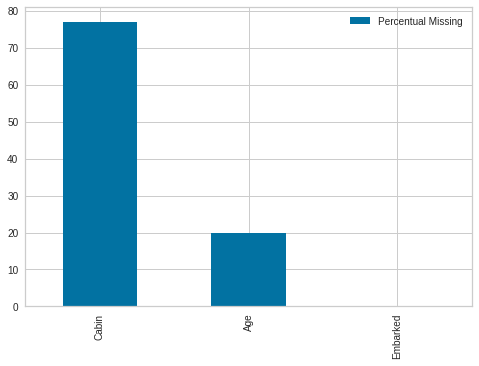

In [37]:
#Check valores faltamte
Visualization.missing_analysis(df)

In [11]:
#Check tipo das colunas
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
#Check valores unicos nas colunas
df.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

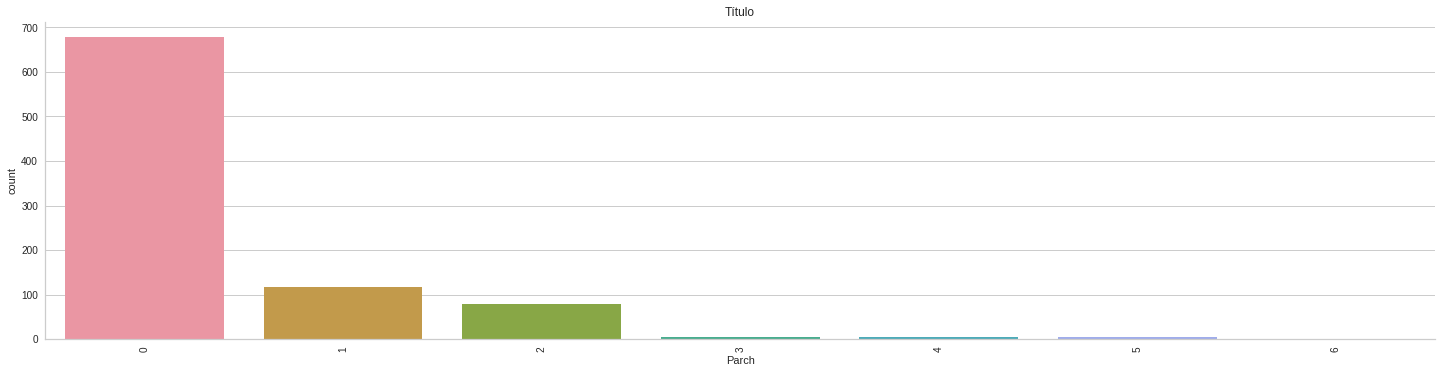

In [43]:
#para visualizar os valores únicos de uma variavel
Visualization.count_values(df, "Parch", "Título")

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Comçando a análise exploratória

todas análise exploratória, começa com uma pergunta. 

### Qual as características das pessoas que sobreviveram e morreram no titanic?

#### Quantidade

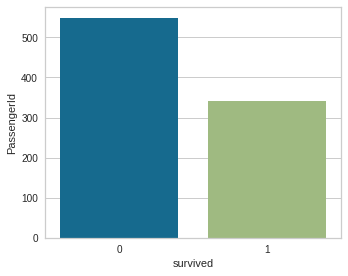

In [69]:
Visualization.bar(df["Survived"], df["PassengerId"], xlabel="survived", ylabel="PassengerId", est=len)

#### Posso modificar o tamanho

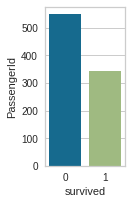

In [118]:
Visualization.bar(df["Survived"], df["PassengerId"], xlabel="survived", ylabel="PassengerId", est=len,\
                  fig_size=(2,3))

#### Posso salvar

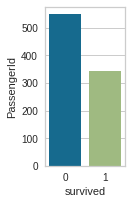

In [119]:
Visualization.bar(df["Survived"], df["PassengerId"], xlabel="survived", ylabel="PassengerId", est=len,\
                  fig_size=(2,3), path="/home/barbara/a3/a3lab/a3lab_ad/output/")

#### E por classe?

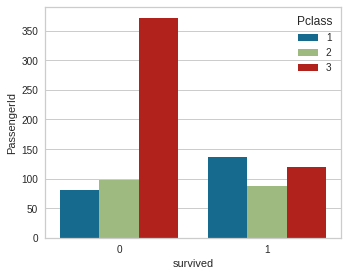

In [73]:
Visualization.bar(df["Survived"], df["PassengerId"], groups=df["Pclass"], xlabel="survived", ylabel="PassengerId", est=len)

#### E sexo?

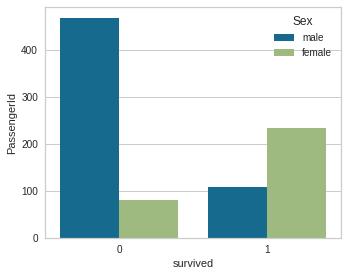

In [74]:
Visualization.bar(df["Survived"], df["PassengerId"], groups=df["Sex"], xlabel="survived", ylabel="PassengerId", est=len)

#### Idade

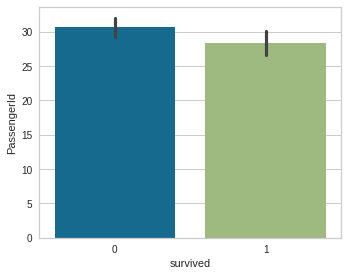

In [76]:
#est=np.mean, est=np.median, est=np.min, est=np.max
Visualization.bar(df["Survived"], df["Age"], xlabel="survived", ylabel="PassengerId", est=np.mean)
#Visualization.bar(df["Survived"], df["Age"], groups=df["Sex"], xlabel="survived", ylabel="PassengerId", est=np.mean)

#### Como a idade varia?

<Figure size 576x396 with 0 Axes>

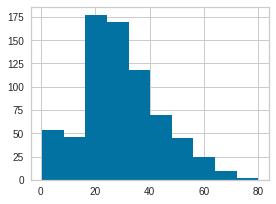

In [47]:
Visualization.histogram(df["Age"], bins=10)

#### E por sexo?

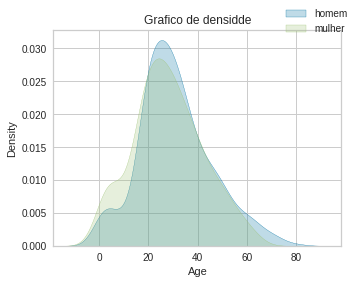

In [87]:
idade_homem = df[df["Sex"] == "male"]["Age"]
idade_mulher = df[df["Sex"] == "female"]["Age"]
Visualization.density_plot(idade_homem, idade_mulher, "Grafico de densidde", "homem", "mulher")

Gráfico de densidade: o valor do eixo y indica a proporção de valores nesse compartimento.

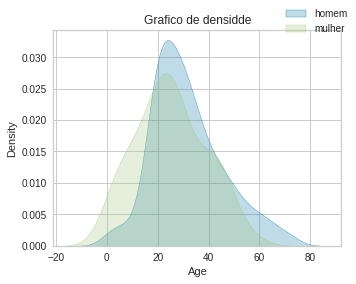

In [89]:
idade_homem_nao_sobreviveu = df[(df["Sex"] == "male")& (df["Survived"] == 0)]["Age"]
idade_mulher_nao_sobreviveu = df[(df["Sex"] == "female")& (df["Survived"] == 0)]["Age"]
Visualization.density_plot(idade_homem_nao_sobreviveu, idade_mulher_nao_sobreviveu, "Grafico de densidde", "homem", "mulher")

#### Outra forma de visualizar a idade pode com o boxplot

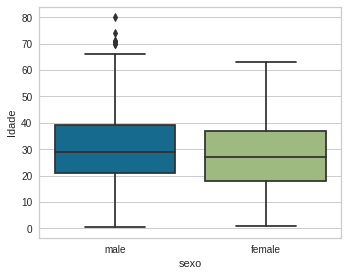

In [113]:
Visualization.box_plot(df["Sex"], df["Age"], xlabel="sexo", ylabel="Idade")

### E se quisermos um gráfico de barra interativo?

#### Como são as tarifas pelas idades?

In [103]:
Visualization.bar_interactive(df, "Age", "Fare", xlabel="Age", ylabel="Fare",hover=["PassengerId","Fare", "Survived"])

alt.Chart(...)

#### E se quiser um gráfico de linha?

In [104]:
Visualization.line_interactive(df, "Age", "Fare", xlabel="Age", ylabel="Fare",hover=["PassengerId","Fare", "Survived"])

alt.Chart(...)

### Qual é a correlação entre as variáveis?

<Figure size 576x396 with 0 Axes>

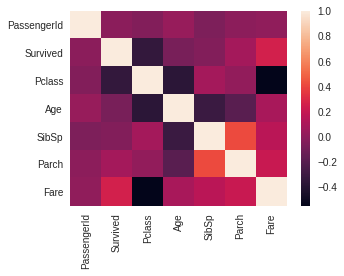

In [114]:
Visualization.correlation_analysis(df)

#### Atenção, nem toda correlação neste gráfico faz sentido... é preciso analisar

<Figure size 576x396 with 0 Axes>

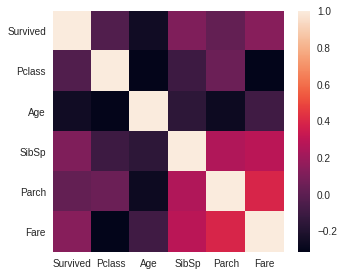

In [128]:
Visualization.correlation_analysis(df.drop(columns=["PassengerId"]))

#### Atenção valores vazios podem alterar o resultado

In [133]:
df_sem_na = df.dropna()

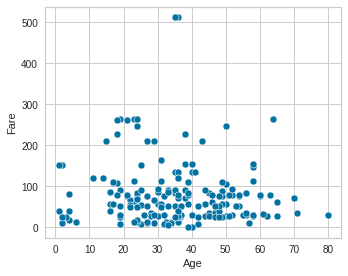

In [140]:
Visualization.scatter(df_sem_na["Age"], df_sem_na["Fare"], xlabel="Age", ylabel="Fare")

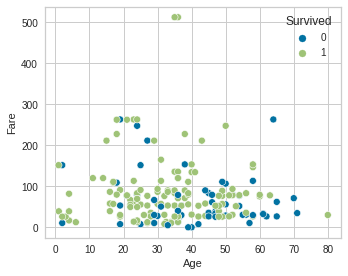

In [141]:
Visualization.scatter(df_sem_na["Age"], df_sem_na["Fare"], groups=df_sem_na["Survived"], xlabel="Age", ylabel="Fare")

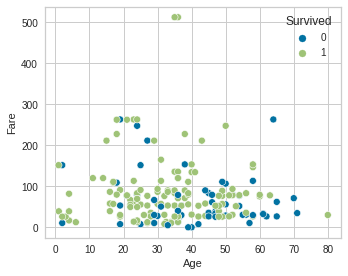

In [147]:
Visualization.scatter(df_sem_na["Age"], df_sem_na["Fare"], groups=df_sem_na["Survived"], xlabel="Age", ylabel="Fare")

In [148]:
np.corrcoef(df["Age"], df["Fare"])

array([[ 1.        , -0.09242386],
       [-0.09242386,  1.        ]])

#### E se quiser o scatter interativo?

In [155]:
Visualization.scatter_interactive(df, "Age", "Fare", xlabel="Age", color="Survived", ylabel="Fare",hover=["PassengerId","Fare", "Survived"])

alt.Chart(...)